## Context
The original dataset contains 1000 entries with 20 categorial/symbolic attributes prepared by Prof. Hofmann. In this dataset, each entry represents a person who takes a credit by a bank. Each person is classified as good or bad credit risks according to the set of attributes. The link to the original dataset can be found below.
```

The dataset has two files:

1. `applicant.csv`: This file contains personal data about the (primary) applicant
- Unique ID: `applicant_id` (string)
- Other fields:
    - Primary_applicant_age_in_years (numeric)
    - Gender (string)
    - Marital_status (string)
    - Number_of_dependents (numeric)
    - Housing (string)
    - Years_at_current_residence (numeric)
    - Employment_status (string)
    - Has_been_employed_for_at_least (string)
    - Has_been_employed_for_at_most (string)
    - Telephone (string)
    - Foreign_worker (numeric)
    - Savings_account_balance (string)
    - Balance_in_existing_bank_account_(lower_limit_of_bucket) (string)
    - Balance_in_existing_bank_account_(upper_limit_of_bucket) (string)

1. `loan.csv`: This file contains data more specific to the loan application
- Target: `high_risk_application` (numeric)
- Other fields:
    - applicant_id (string)
    - Months_loan_taken_for (numeric)
    - Purpose (string)
    - Principal_loan_amount (numeric)
    - EMI_rate_in_percentage_of_disposable_income (numeric)
    - Property (string)
    - Has_coapplicant (numeric)
    - Has_guarantor (numeric)
    - Other_EMI_plans (string)
    - Number_of_existing_loans_at_this_bank (numeric)
    - Loan_history (string)



## 2. Librarys:
* Importing Librarys
* Importing Dataset

In [1]:
#Load the librarys
import pandas as pd #To work with dataset
import numpy as np #Math library
import seaborn as sns #Graph library that use matplot in background
import matplotlib.pyplot as plt #to plot some parameters in seaborn

import chardet

def find_encoding(fname):
    r_file = open(fname, 'rb').read()
    result = chardet.detect(r_file)
    charenc = result['encoding']
    return charenc

print("Encoding of the application_data file: " + find_encoding('/content/applicant.csv'))
print("Encoding of the previous_application file: " + find_encoding('/content/loan.csv'))

Encoding of the application_data file: ascii
Encoding of the previous_application file: ascii


In [2]:
application_data = pd.read_csv('/content/applicant.csv', encoding = 'ascii')
loan_data = pd.read_csv('/content/loan.csv', encoding = 'ascii')


## 3. First Look at the data:
* Looking the Type of Data
* Null Numbers
* Unique values
* The first rows of our dataset

In [4]:
#Searching for Missings,type of data and also known the shape of data
print(application_data.info())
print(loan_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   applicant_id                                              1000 non-null   int64 
 1   Primary_applicant_age_in_years                            1000 non-null   int64 
 2   Gender                                                    1000 non-null   object
 3   Marital_status                                            1000 non-null   object
 4   Number_of_dependents                                      1000 non-null   int64 
 5   Housing                                                   1000 non-null   object
 6   Years_at_current_residence                                1000 non-null   int64 
 7   Employment_status                                         1000 non-null   object
 8   Has_been_employed_for_at_leas

In [6]:
#Looking unique values
print(application_data.nunique())
print(loan_data.nunique())
#Looking the data
print(application_data.head())
print(loan_data.head())

applicant_id                                                1000
Primary_applicant_age_in_years                                53
Gender                                                         2
Marital_status                                                 4
Number_of_dependents                                           2
Housing                                                        3
Years_at_current_residence                                     4
Employment_status                                              4
Has_been_employed_for_at_least                                 4
Has_been_employed_for_at_most                                  4
Telephone                                                      1
Foreign_worker                                                 2
Savings_account_balance                                        4
Balance_in_existing_bank_account_(lower_limit_of_bucket)       2
Balance_in_existing_bank_account_(upper_limit_of_bucket)       2
dtype: int64
loan_applica

## 4. Merging the Data 
*  Values using Unique ID 
*  Left Outer Join

In [7]:
#Merging the data using the left outer join and also known the shape of data
df = application_data.merge(loan_data, on='applicant_id', how='left')

In [9]:
df.head(1)

,applicant_id,Primary_applicant_age_in_years,Gender,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Has_been_employed_for_at_least,Has_been_employed_for_at_most,...,Purpose,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Other_EMI_plans,Number_of_existing_loans_at_this_bank,Loan_history,high_risk_applicant
0,1469590,67,male,single,1,own,4,skilled employee / official,7 years,NaN,...,electronic equipment,1169000,4,real estate,0,0,NaN,2,critical/pending loans at other banks,0


In [54]:
print(df.nunique())

applicant_id                                                1000
Primary_applicant_age_in_years                                53
Gender                                                         2
Marital_status                                                 4
Number_of_dependents                                           2
Housing                                                        3
Years_at_current_residence                                     4
Employment_status                                              4
Has_been_employed_for_at_least                                 4
Has_been_employed_for_at_most                                  4
Telephone                                                      1
Foreign_worker                                                 2
Savings_account_balance                                        4
Balance_in_existing_bank_account_(lower_limit_of_bucket)       2
Balance_in_existing_bank_account_(upper_limit_of_bucket)       2
loan_application_id      

## 5. Some explorations:
* Starting by distribuition of column Age.
* Some Seaborn graphical
* Columns crossing


## Let's start looking through target variable and their distribuition

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
sns.set_style('whitegrid')
import plotly.offline as py 
import plotly.express as px
import plotly.graph_objects as go
import plotly.tools as tls    
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
from collections import Counter    

### UNIVARIATE ANALYSIS

In [45]:
# Distribution graphs (histogram/bar graph) of column data with (num)
def plotNumColumnDistribution(df,nGraphPerRow):
    print(f'=== Distribution of features with number values ===')
    
    df = df[[col for col in df.select_dtypes(np.number)]] # pick columns with bumber type
    
    nRow, nCol = df.shape
    columnNames = list(df)
    print(columnNames)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 3 * nGraphRow))
 
    for i, col in enumerate(columnNames):
        # Plot distribution 
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        sns.distplot(df[col], color='blue')
        plt.title(f'Distribution of {col}')
    # Show the plot
    plt.tight_layout()
    plt.show()

=== Distribution of features with number values ===
['applicant_id', 'Primary_applicant_age_in_years', 'Number_of_dependents', 'Years_at_current_residence', 'Foreign_worker', 'Months_loan_taken_for', 'Principal_loan_amount', 'EMI_rate_in_percentage_of_disposable_income', 'Has_coapplicant', 'Has_guarantor', 'Number_of_existing_loans_at_this_bank', 'high_risk_applicant']


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/di

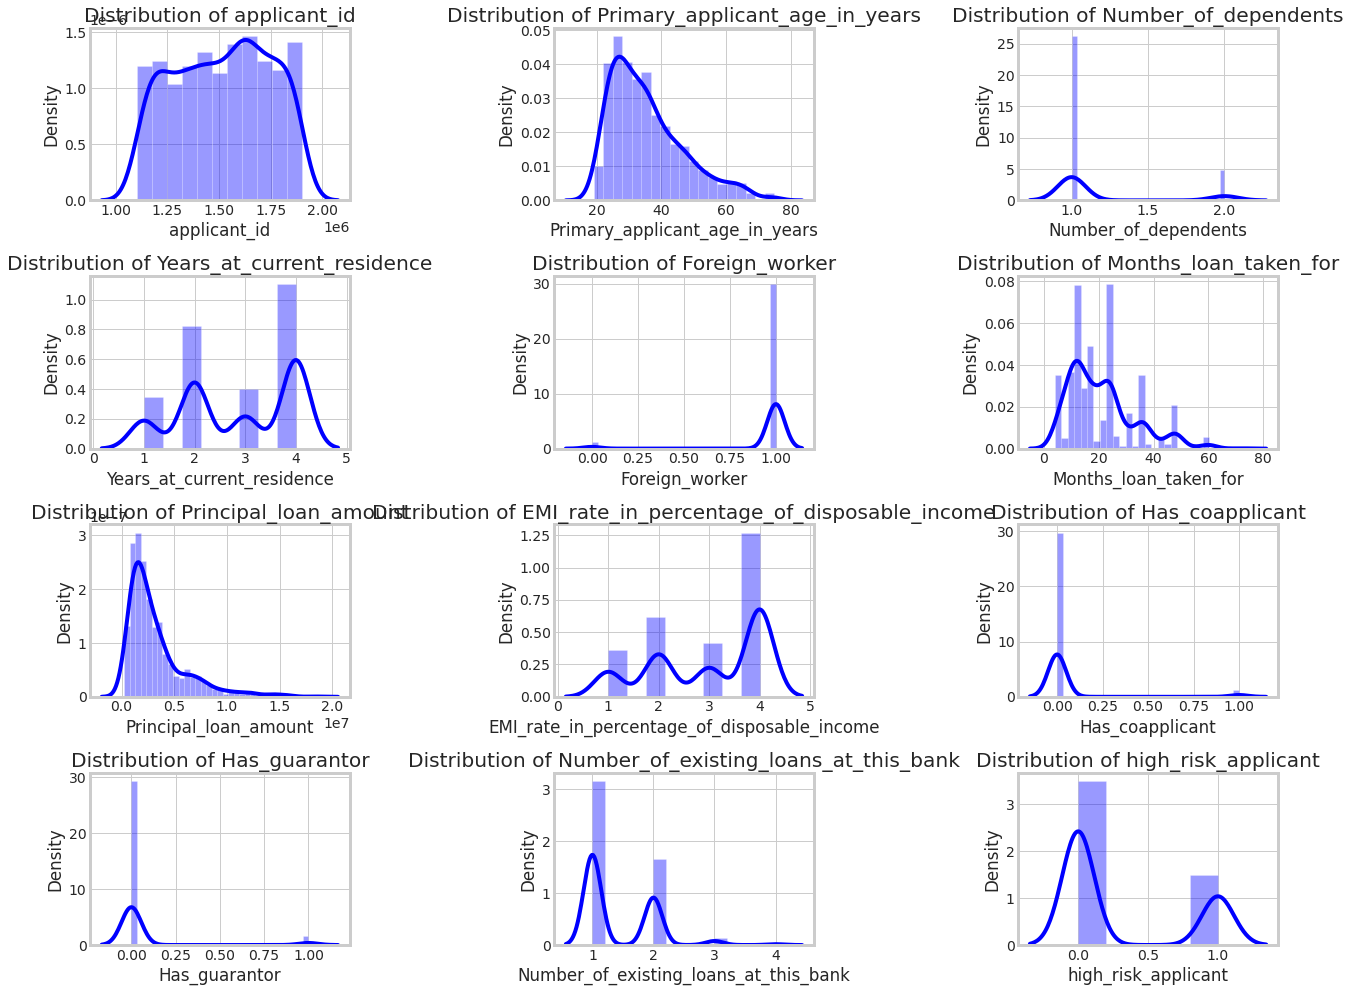

In [46]:
plotNumColumnDistribution(df, 3)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/_d

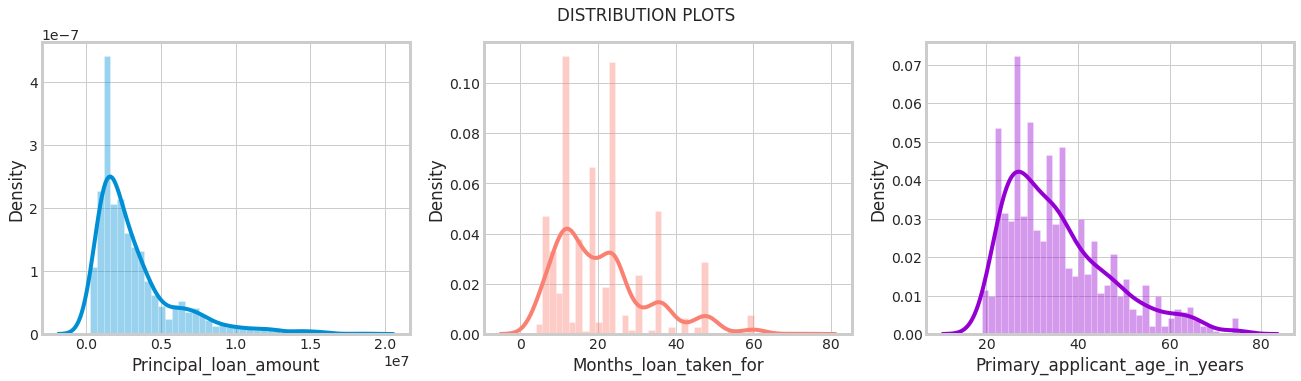

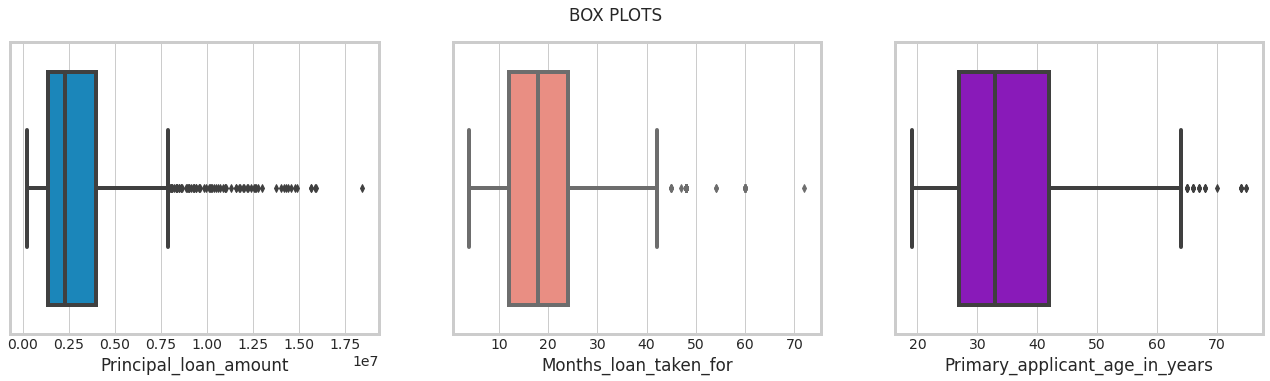

In [47]:
fig, ax = plt.subplots(1,3,figsize=(20,5))
plt.suptitle('DISTRIBUTION PLOTS')
sns.distplot(df['Principal_loan_amount'], bins=40, ax=ax[0]);
sns.distplot(df['Months_loan_taken_for'], bins=40, ax=ax[1], color='salmon');
sns.distplot(df['Primary_applicant_age_in_years'], bins=40, ax=ax[2], color='darkviolet');

fig, ax = plt.subplots(1,3,figsize=(20,5))
plt.suptitle('BOX PLOTS')
sns.boxplot(df['Principal_loan_amount'], ax=ax[0]);
sns.boxplot(df['Months_loan_taken_for'], ax=ax[1], color='salmon');
sns.boxplot(df['Primary_applicant_age_in_years'], ax=ax[2], color='darkviolet');

#### INSIGHTS

---


* Most of the credit have an amount of 1500 - 4000 
* The loan amount is positively skewed, So the samples are dispersed
* Credit.Amount has a highly skewed distribution (mean = 3271.258, median = 2319.5, skew = 1.9437827). It's also right-skewed, the credit amount is almost less than 50000.
* Age and Duration also has higly right-skewed distribution

In skewed data, the tail region may act as an outlier for the statistical model and we know that outliers adversely effect the model's performance especially regression based model. So there is a necessity to transform the skewed data to close enough to a Gaussian distribution or Normal distribution. This will be shown in the following section.

#### COUNTPLOTS (GENDER & RISK FACTOR)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



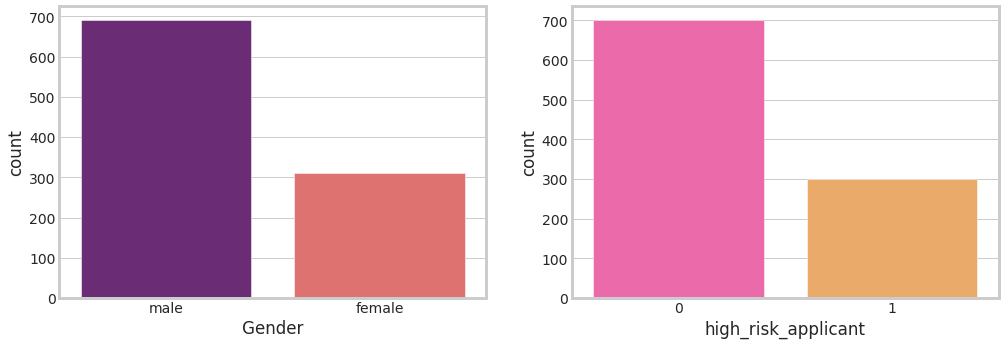

In [40]:
fig, ax = plt.subplots(1,2,figsize=(15,5))

sns.countplot(df['Gender'], ax=ax[0], palette='magma');
sns.countplot(df.high_risk_applicant, ax=ax[1], palette='spring');

#### INSIGHTS

---


* Most of the credit candiate is Male 



In [48]:
#Show basic stats
df[['Primary_applicant_age_in_years', 'Months_loan_taken_for', 'Principal_loan_amount']].describe()

,Primary_applicant_age_in_years,Months_loan_taken_for,Principal_loan_amount
count,1000.000000,1000.000000,1.000000e+03
mean,35.546000,20.903000,3.271258e+06
std,11.375469,12.058814,2.822737e+06
min,19.000000,4.000000,2.500000e+05
25%,27.000000,12.000000,1.365500e+06
50%,33.000000,18.000000,2.319500e+06
75%,42.000000,24.000000,3.972250e+06
max,75.000000,72.000000,1.842400e+07


#### BIVARIATE ANALYSIS

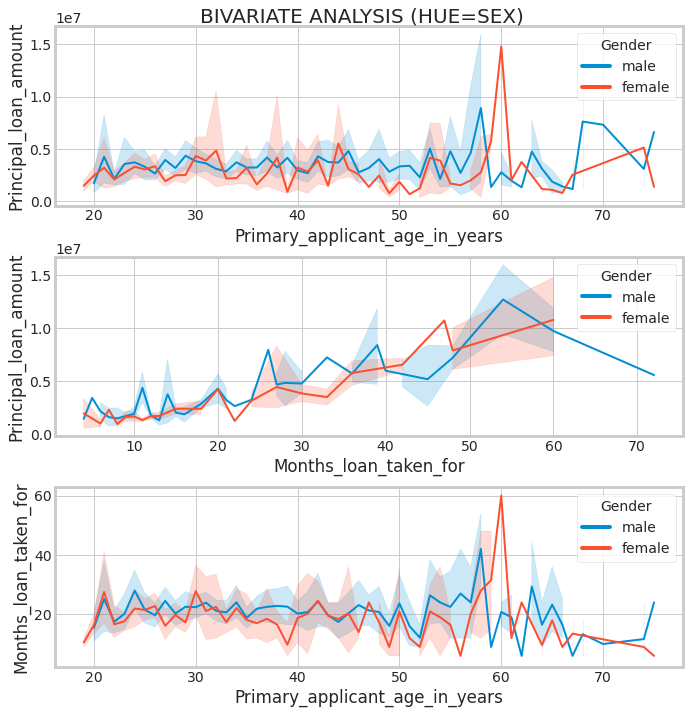

In [50]:
fig, ax = plt.subplots(3,1,figsize=(10,10))
plt.suptitle('BIVARIATE ANALYSIS (HUE=SEX)', fontsize=20)
plt.tight_layout(2)

sns.lineplot(data=df, x='Primary_applicant_age_in_years', y='Principal_loan_amount', hue='Gender', lw=2, ax=ax[0]);
sns.lineplot(data=df, x='Months_loan_taken_for', y='Principal_loan_amount', hue='Gender', lw=2, ax=ax[1]);
sns.lineplot(data=df, x='Primary_applicant_age_in_years', y='Months_loan_taken_for', hue='Gender', lw=2, ax=ax[2]);

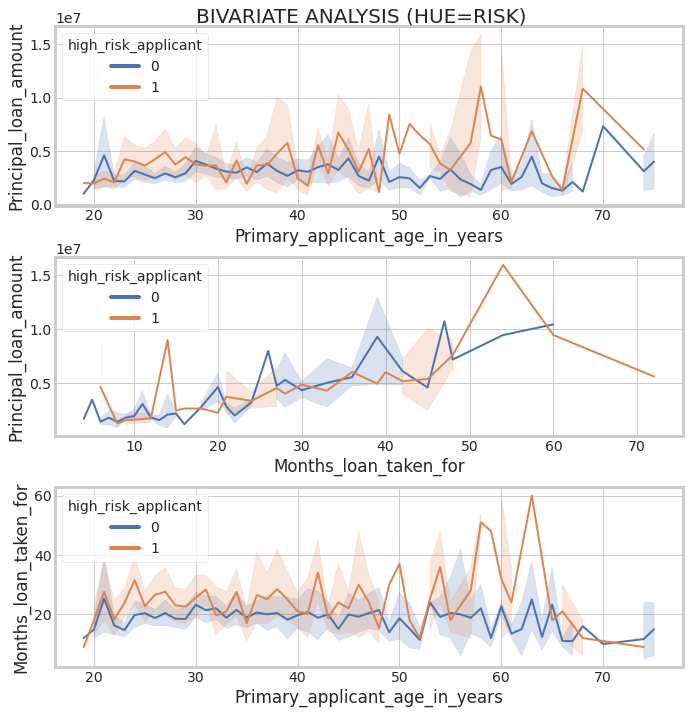

In [52]:
ig, ax = plt.subplots(3,1,figsize=(10,10))
plt.suptitle('BIVARIATE ANALYSIS (HUE=RISK)', fontsize=20)
plt.tight_layout(2)

sns.lineplot(data=df, x='Primary_applicant_age_in_years', y='Principal_loan_amount', hue='high_risk_applicant', lw=2, ax=ax[0], palette='deep');
sns.lineplot(data=df, x='Months_loan_taken_for', y='Principal_loan_amount', hue='high_risk_applicant', lw=2, ax=ax[1], palette='deep');
sns.lineplot(data=df, x='Primary_applicant_age_in_years', y='Months_loan_taken_for', hue='high_risk_applicant', lw=2, ax=ax[2], palette='deep');

#### INSIGHTS


---


* There is a linear relationship between Duration and Credit Amount, which makes sense given that people typically take larger credits for longer periods of time. 
* The relationship between age and credit amount is unclear.

#### Summary:
 When compared to older age groups, the younger age group requested slightly higher loan amounts. 
* The young and elderly had the highest proportion of high-risk loans. With 45.29% of all clients under the age of 35 being considered high risk.  
* The number of loans classified as high risk among the elderly constitutes 44.28% of the total number of people classified as elderly.
* It's worth noting that these are the groups that are most likely to be unemployed or working part-time, because the youngest group either lacks the experience to get a job or is studying at a university, so they don't have enough time to work full-time. 
* On the elderly side, this is the group that is most likely receiving money from their pensions, implying that the elderly are either unemployed or working part-time.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



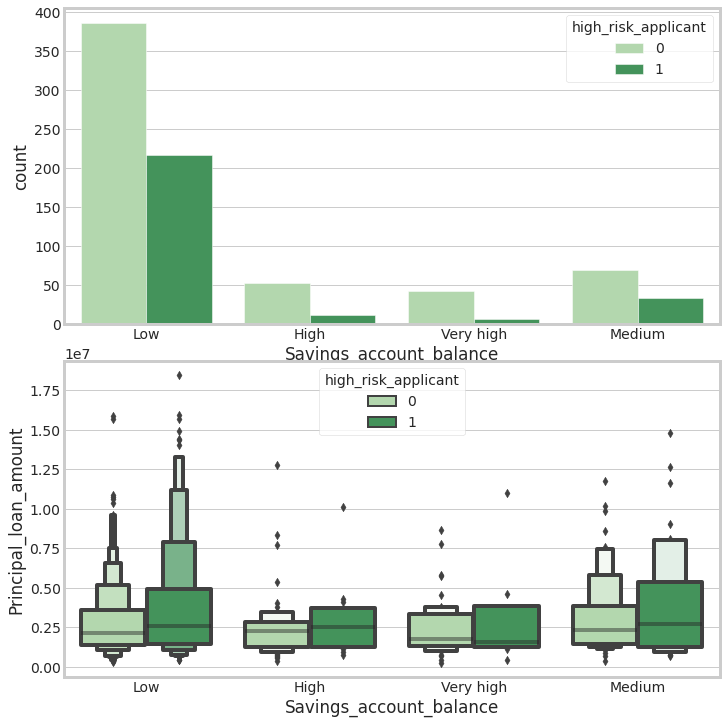

In [68]:
fig, ax =plt.subplots(2,1,figsize=(10,10))
plt.tight_layout(1)

sns.countplot(df['Savings_account_balance'], hue=df.high_risk_applicant, ax=ax[0], palette='Greens');
sns.boxenplot(df['Savings_account_balance'], df['Principal_loan_amount'], hue=df.high_risk_applicant, ax=ax[1], palette='Greens');


#### INSIGHTS


---


* The risk on the higher deposit account of 2lac is minimal. 
* The lower limit ac deposit account with less than 2lac has a high tendency risk.

#### ANALYSIS BY CREDIT PURPOSE.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



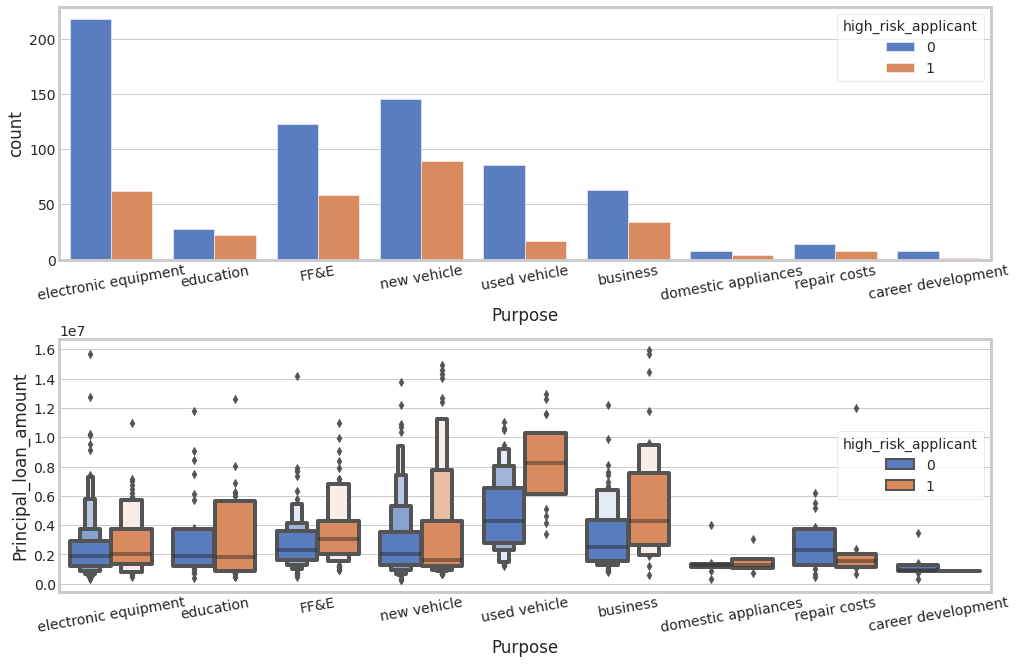

In [73]:
fig, ax =plt.subplots(2,1,figsize=(15,10))
plt.tight_layout(4)

for i in range(2):
    ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=10)


sns.countplot(df['Purpose'], hue=df.high_risk_applicant, ax=ax[0], palette='muted');
sns.boxenplot(df['Purpose'], df['Principal_loan_amount'], hue=df.high_risk_applicant, ax=ax[1], palette='muted');

#### INSIGHTS


---


* Unexpected uesd vechile expenses. with the additional other unditenfied expenses
* The lower limit ac credit with home appliances high tendency risk.

#### PER HOUSING

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



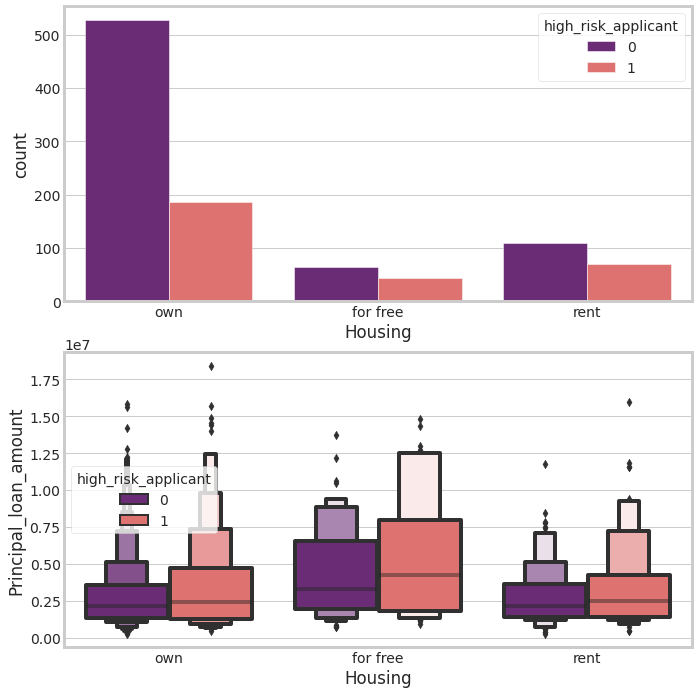

In [74]:
fig, ax =plt.subplots(2,1,figsize=(10,10))
plt.tight_layout(2)

sns.countplot(df['Housing'], hue=df.high_risk_applicant, ax=ax[0], palette='magma');
sns.boxenplot(df['Housing'], df['Principal_loan_amount'], hue=df.high_risk_applicant, ax=ax[1], palette='magma');


#### INSIGHTS


---


* The Own home individual having a restricted instance of hazard rather with much ward residency candiate .
* High Gamble expressed in the Qualities having the colossal credit sum.

#### Investigating Loan Purposes:
* In this section, my main goal is to determine which purposes are most likely to bring the most risk, or which of these purposes are more likely to be considered high risk loans. 
* In addition, I'd like to investigate the operational side of the business by determining which purposes contributed the most to loans issued.

#### Summary:
* Cars, Radio/TV and Furniture and Equipment made more than 50 % of the total risk and has the highest distribution of credit issued
* The rest of the purposes were not frequent purposes in applying for a loan.
Cars and Radio/TV purposes were the less risky from the operative perspective since it had the widest gap between good and bad risk.